# Finance & Economics Data - Time Series Analysis

## Team - Econometrics

#### Dataset used - Finance & Economics Dataset (2000 - Present) (https://www.kaggle.com/datasets/khushikyad001/finance-and-economics-dataset-2000-present)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [21]:
print("---  Data Understanding & Cleaning ---")

try:
    df = pd.read_csv('finance_economics_dataset.csv', parse_dates=['Date'], index_col='Date')
    print("Successfully loaded data from 'Finance&Economics_dataset.csv'.")
except FileNotFoundError:
    print("Error: 'Finance&Economics_dataset.csv' not found.")
    print("Please download the dataset from Kaggle and place it in the correct folder.")
    exit() # Exit the script if the file isn't found

# The project specifies a time range of 2000-2008,filtering the dataset.
df = df.loc['2000-01-01':'2008-12-31']

# Renaming columns for consistency and ease of use
df = df.rename(columns={
    'SP500_Index': 'SP500',
    'Inflation': 'CPI',
    'Interest_Rate': 'InterestRate',
    'Unemployment_Rate': 'UnemploymentRate'
})

---  Data Understanding & Cleaning ---
Successfully loaded data from 'Finance&Economics_dataset.csv'.


In [23]:
# 1.2 Dataset Exploration
print("\nInitial Data Exploration:")
print("Shape of the dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())
print("\nData types and null values:")
df.info()
print("\nColums:")
df.columns


Initial Data Exploration:
Shape of the dataset: (3000, 23)

First 5 rows:
           Stock Index  Open Price  Close Price  Daily High  Daily Low  \
Date                                                                     
2000-01-01   Dow Jones     2128.75      2138.48     2143.70    2100.55   
2000-01-02     S&P 500     2046.82      2036.18     2082.83    2009.53   
2000-01-03   Dow Jones     1987.92      1985.26     2022.28    1978.37   
2000-01-04   Dow Jones     4625.02      4660.47     4665.26    4595.46   
2000-01-05     S&P 500     1998.18      1982.18     2044.31    1966.44   

            Trading Volume  GDP Growth (%)  Inflation Rate (%)  \
Date                                                             
2000-01-01         2670411           -0.37                6.06   
2000-01-02       690220415            3.19                4.95   
2000-01-03       315284661            5.54                9.13   
2000-01-04        13098297           10.00                3.77   
2000-01-05

Index(['Stock Index', 'Open Price', 'Close Price', 'Daily High', 'Daily Low',
       'Trading Volume', 'GDP Growth (%)', 'Inflation Rate (%)',
       'Unemployment Rate (%)', 'Interest Rate (%)',
       'Consumer Confidence Index', 'Government Debt (Billion USD)',
       'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY',
       'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)',
       'Real Estate Index', 'Retail Sales (Billion USD)',
       'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals',
       'Venture Capital Funding (Billion USD)',
       'Consumer Spending (Billion USD)'],
      dtype='object')

In [25]:
# 1.3 Data Cleaning & Preprocessing
# Checking and handling the missing values.

if df.isnull().sum().any():
    print("\nMissing values found. Applying forward-fill and back-fill...")
    # We will use forward-fill to propagate the last known value.
    df_cleaned = df.ffill()
    # Use back-fill for any remaining NaNs at the beginning of the series.
    df_cleaned = df_cleaned.bfill()
else:
    print("\nNo missing values found in the dataset for the specified date range.")
    df_cleaned = df.copy()


print("\nMissing values after cleaning (if any):")
print(df_cleaned.isnull().sum())

print("\nCleaned data info:")
df_cleaned.info()


No missing values found in the dataset for the specified date range.

Missing values after cleaning (if any):
Stock Index                              0
Open Price                               0
Close Price                              0
Daily High                               0
Daily Low                                0
Trading Volume                           0
GDP Growth (%)                           0
Inflation Rate (%)                       0
Unemployment Rate (%)                    0
Interest Rate (%)                        0
Consumer Confidence Index                0
Government Debt (Billion USD)            0
Corporate Profits (Billion USD)          0
Forex USD/EUR                            0
Forex USD/JPY                            0
Crude Oil Price (USD per Barrel)         0
Gold Price (USD per Ounce)               0
Real Estate Index                        0
Retail Sales (Billion USD)               0
Bankruptcy Rate (%)                      0
Mergers & Acquisitions Deals 


--- Exploratory Data Analysis (EDA) ---
Generating time-series plots...

Plotting the following numeric columns: ['Open Price', 'Close Price', 'Daily High', 'Daily Low', 'Trading Volume', 'GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 'Consumer Confidence Index', 'Government Debt (Billion USD)', 'Corporate Profits (Billion USD)', 'Forex USD/EUR', 'Forex USD/JPY', 'Crude Oil Price (USD per Barrel)', 'Gold Price (USD per Ounce)', 'Real Estate Index', 'Retail Sales (Billion USD)', 'Bankruptcy Rate (%)', 'Mergers & Acquisitions Deals', 'Venture Capital Funding (Billion USD)', 'Consumer Spending (Billion USD)']
Saved 'timeseries_plots.png'



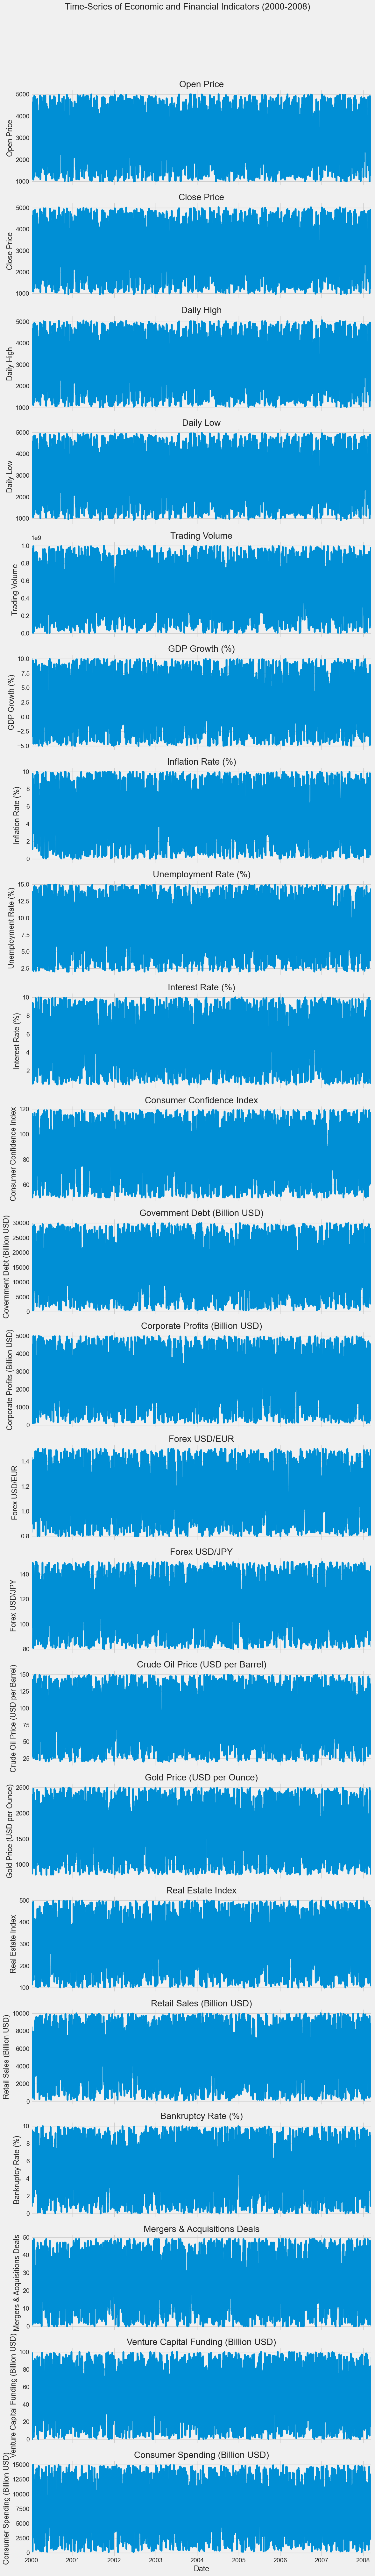

In [27]:
print("\n--- Exploratory Data Analysis (EDA) ---")

# 2.1 Visualizing Key Indicators
# Plotting each time series to observe long-term trends and major events (e.g., 2008 crisis).
print("Generating time-series plots...")

# ---  Adding a robust check for numeric columns before plotting ---
# Identify only the numeric columns to avoid the 'no numeric data to plot' error.
numeric_columns = df_cleaned.select_dtypes(include=np.number).columns.tolist()

if not numeric_columns:
    print("\nError: No numeric columns were found in the dataset to plot. Please check the data cleaning steps.")
else:
    # Adjust the number of rows to match the count of numeric columns
    fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(12, len(numeric_columns) * 4), sharex=True)
    
    # Handle the case where there is only one numeric column, as 'axes' will not be an array
    if len(numeric_columns) == 1:
        axes = [axes]

    print(f"\nPlotting the following numeric columns: {numeric_columns}")

    for i, col in enumerate(numeric_columns):
        df_cleaned[col].plot(ax=axes[i], title=col)
        axes[i].set_ylabel(col)
    
    plt.suptitle('Time-Series of Economic and Financial Indicators (2000-2008)', fontsize=20, y=0.92)
    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.savefig('timeseries_plots.png')
    print("Saved 'timeseries_plots.png'")

# Add a check to inform the user about any columns that were skipped
non_numeric_columns = df_cleaned.select_dtypes(exclude=np.number).columns.tolist()
if non_numeric_columns:
    print(f"\nWarning: The following columns were skipped because they are not numeric: {non_numeric_columns}")